# Assignment8


##### I have choosen data for Heart Disease in USA over (Deaths occured in different states from 1999-2020) for map series generation: URL: https://wonder.cdc.gov/controller/datarequest/D76

In [1]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
     map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
     map_data.rename(columns={"State":"state"},
                    inplace = True)
     map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
     map_data["COUNTYFP"].astype(str)
     map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
     map_data.set_index(FIPS_name, inplace=True)
    
     return map_data

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

#if "data_processed" not in locals():
fips_name = "fips_code"
# covid_filename = "COVID19DataAP.csv"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)
# dates will be used to create a geopandas DataFrame with multiindex 
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [3]:
map_data["geometry"]

fips_code
21007    POLYGON ((-89.18137 37.04630, -89.17938 37.053...
21017    POLYGON ((-84.44266 38.28324, -84.44114 38.283...
21031    POLYGON ((-86.94486 37.07341, -86.94346 37.074...
21065    POLYGON ((-84.12662 37.64540, -84.12483 37.646...
21069    POLYGON ((-83.98428 38.44549, -83.98246 38.450...
                               ...                        
31073    POLYGON ((-100.09510 40.43866, -100.08937 40.4...
39075    POLYGON ((-82.22066 40.66758, -82.19327 40.667...
48171    POLYGON ((-99.30400 30.49983, -99.28234 30.499...
55079    POLYGON ((-88.06959 42.86726, -88.06959 42.872...
26139    POLYGON ((-86.26432 43.11830, -86.25103 43.118...
Name: geometry, Length: 3142, dtype: geometry

In [4]:
map_data.dtypes

STATEFP          int64
COUNTYFP        object
COUNTYNS        object
AFFGEOID        object
NAME            object
LSAD            object
ALAND            int64
AWATER           int64
Population     float64
state           object
geometry      geometry
dtype: object

In [5]:
u_data = pd.read_csv("HDSouthData.csv")
u_data

,State,State Code,Year,Deaths,Population,Crude Rate
0,Alabama,1,1999,44806,4430141,1011.4
1,Alabama,1,2000,45062,4447100,1013.3
2,Alabama,1,2001,45316,4467634,1014.3
3,Alabama,1,2002,46069,4480089,1028.3
4,Alabama,1,2003,46716,4503491,1037.3
...,...,...,...,...,...,...
1117,Wyoming,56,2016,4722,585501,806.5
1118,Wyoming,56,2017,4768,579315,823.0
1119,Wyoming,56,2018,5070,577737,877.6
1120,Wyoming,56,2019,5121,578759,884.8


In [6]:
u_data.rename(columns={'State': 'state'}, inplace=True)
#u_data.rename(columns={'Year Code': 'Year'}, inplace=True)
u_data.dtypes

state          object
State Code      int64
Year            int64
Deaths          int64
Population      int64
Crude Rate    float64
dtype: object

In [7]:
map_data.dtypes

STATEFP          int64
COUNTYFP        object
COUNTYNS        object
AFFGEOID        object
NAME            object
LSAD            object
ALAND            int64
AWATER           int64
Population     float64
state           object
geometry      geometry
dtype: object

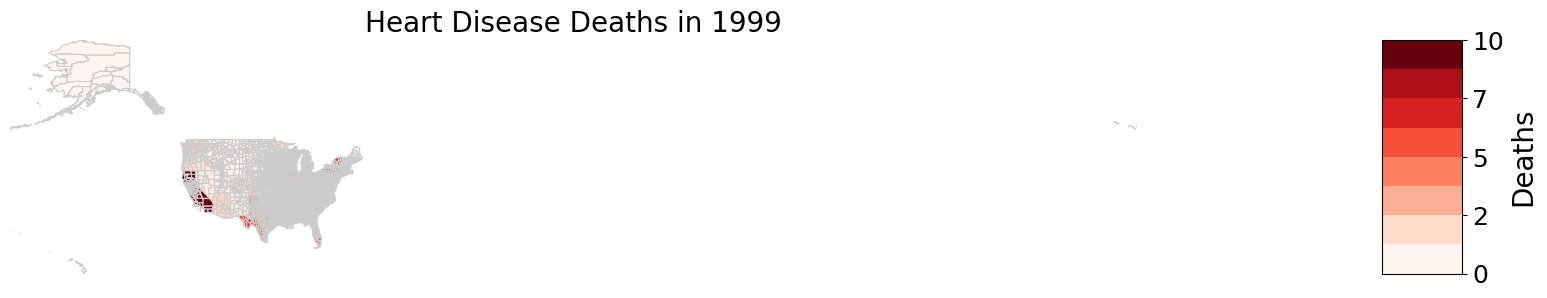

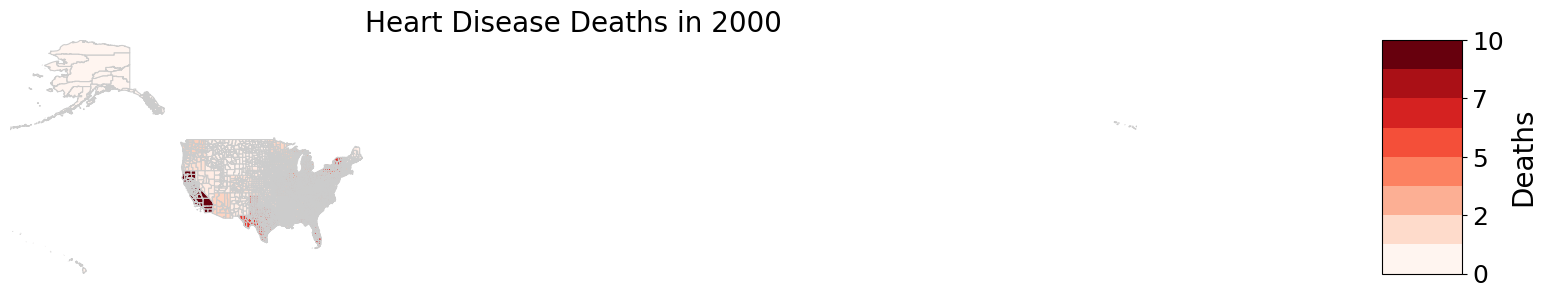

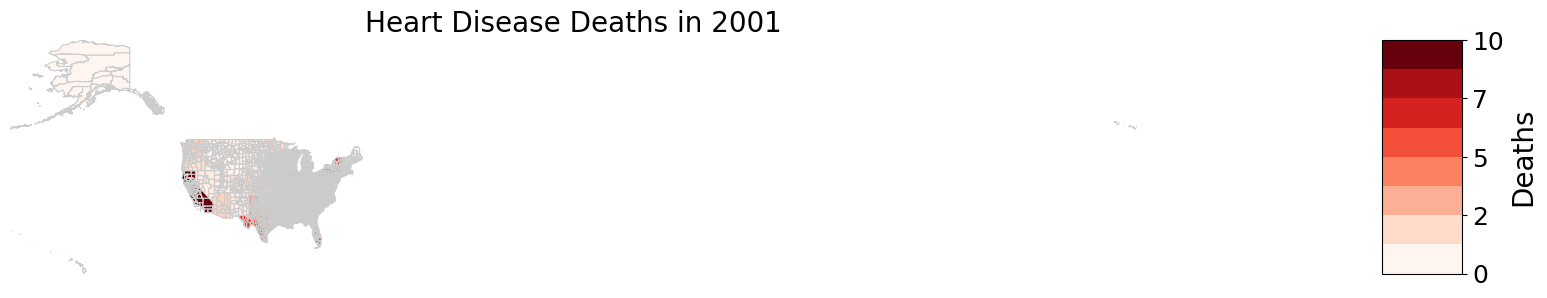

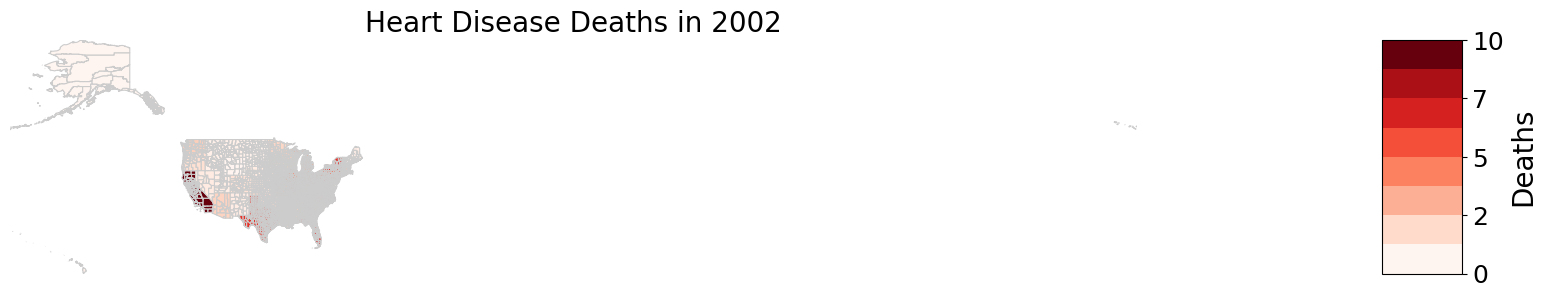

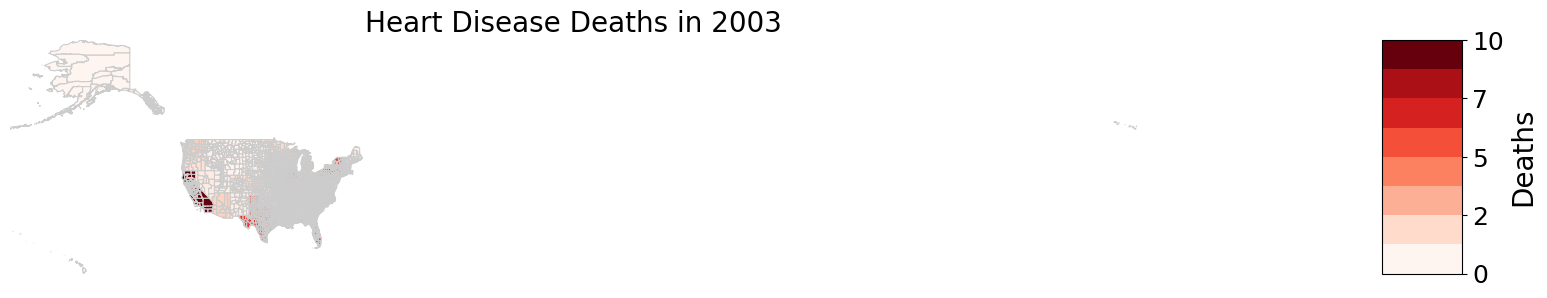

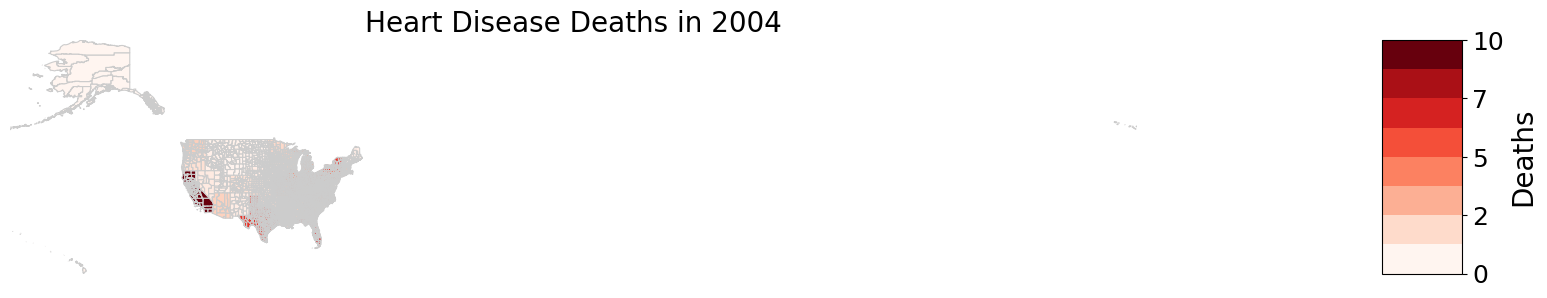

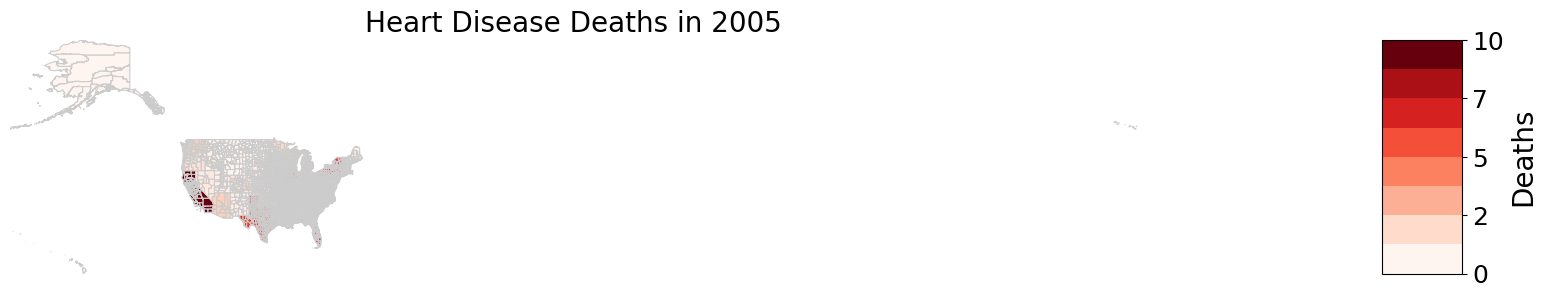

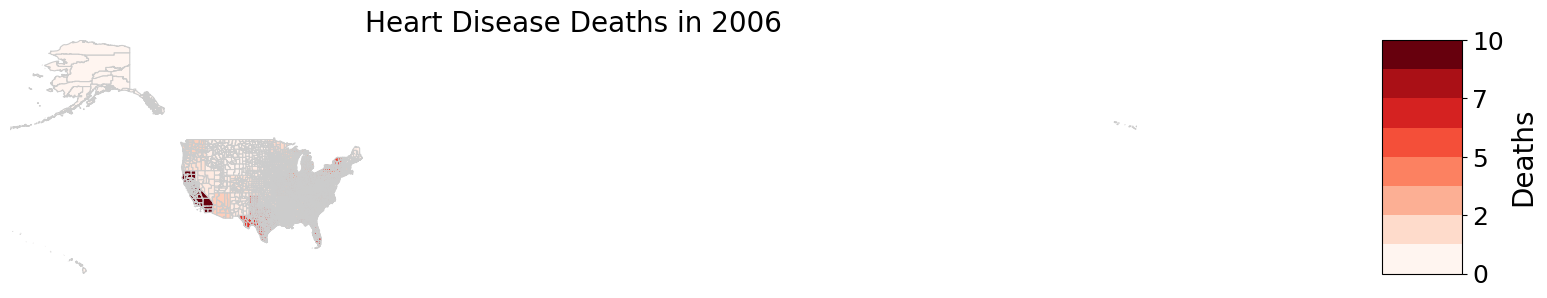

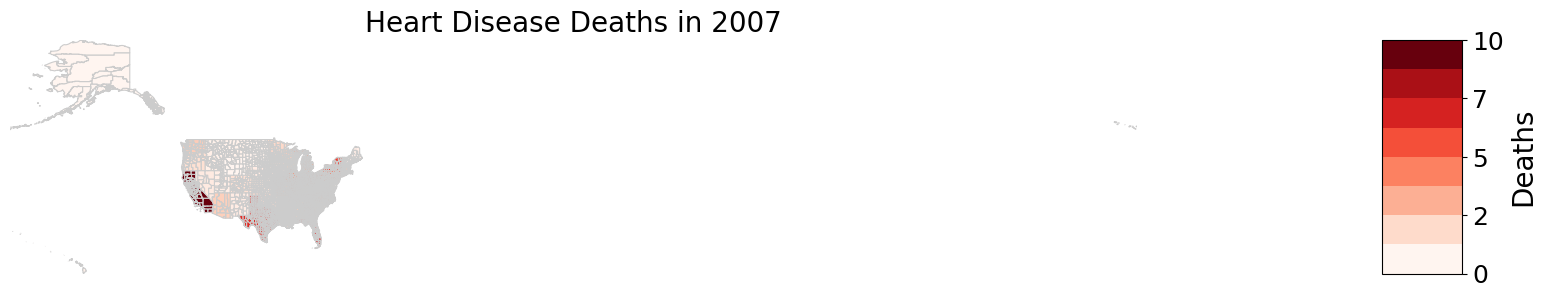

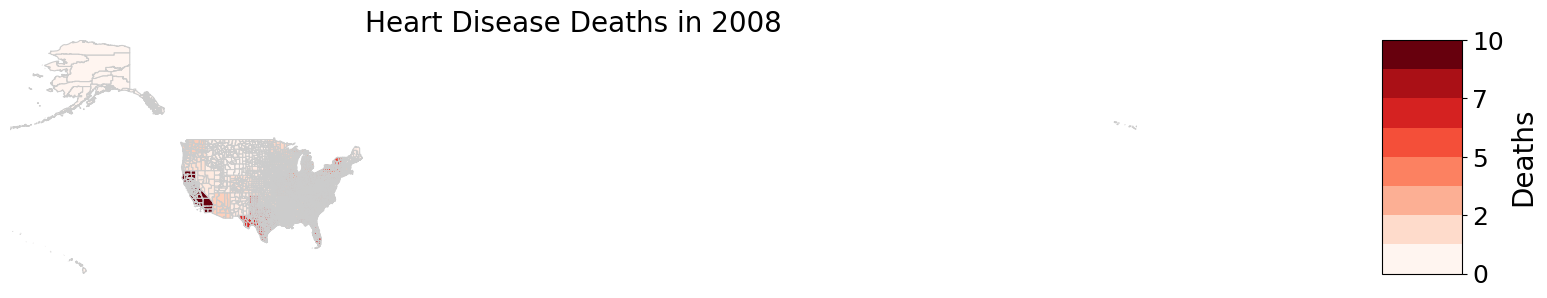

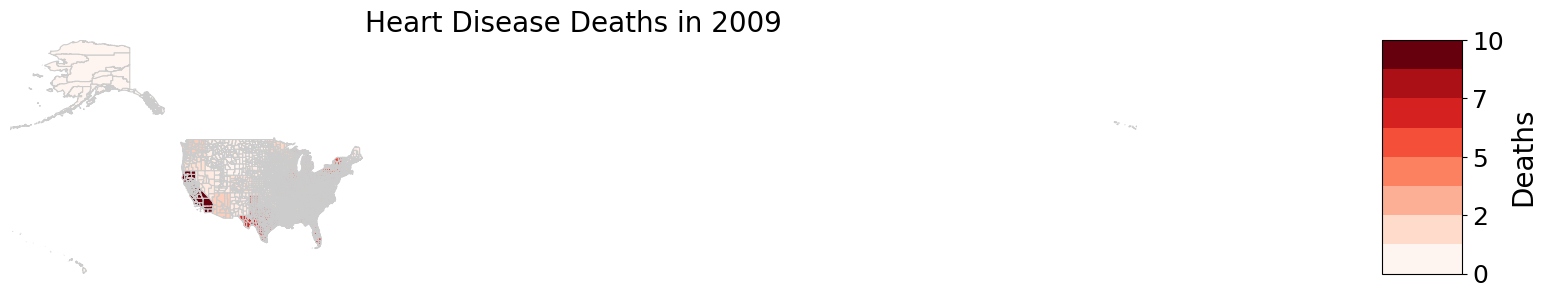

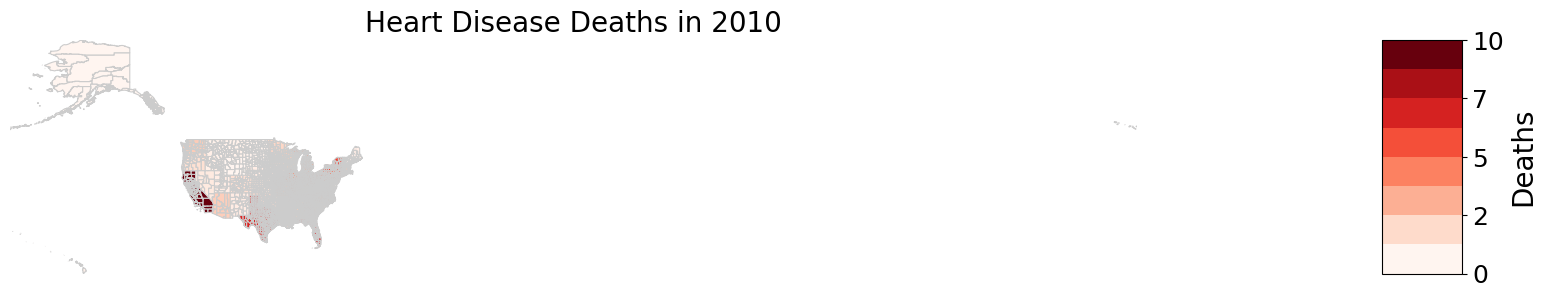

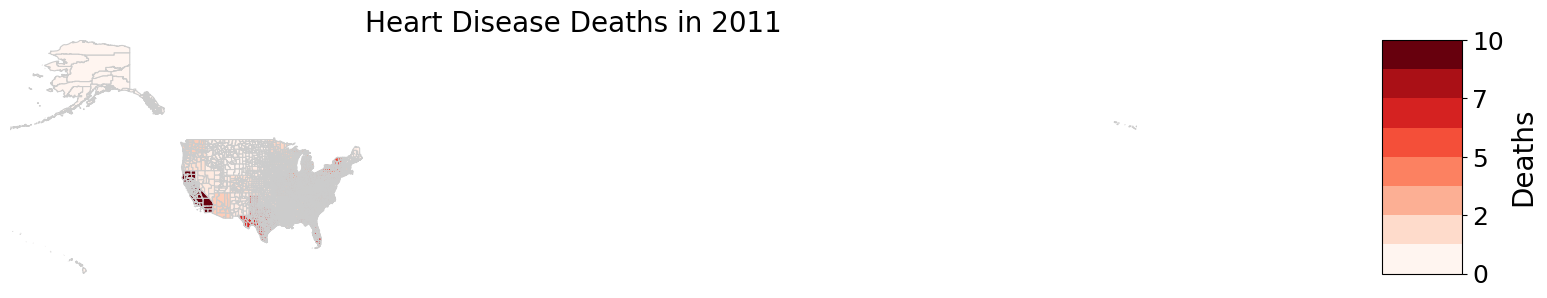

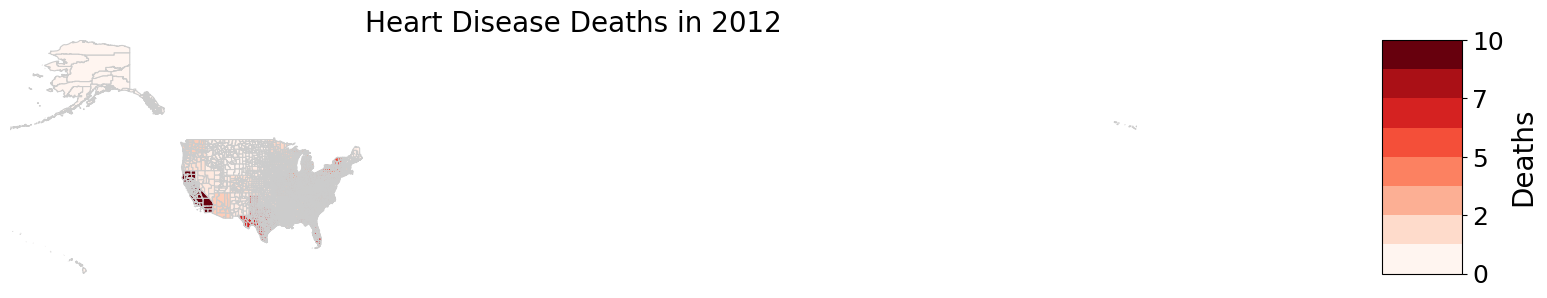

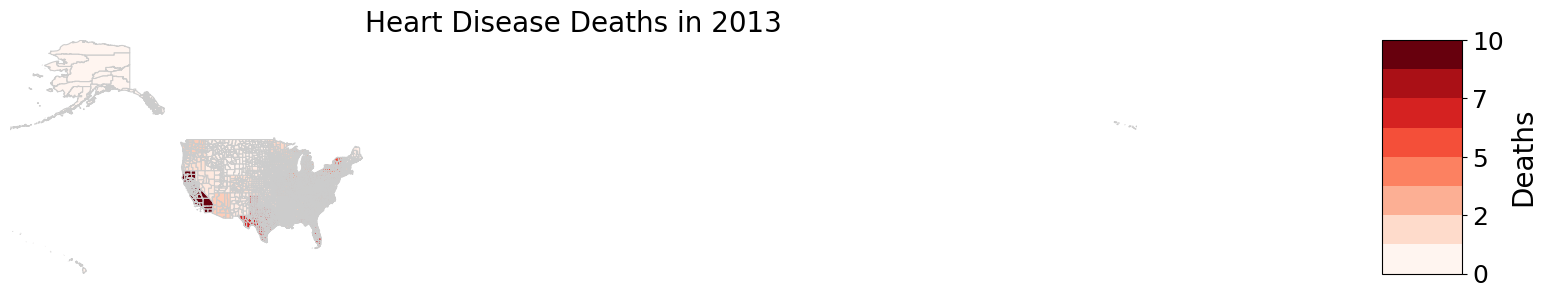

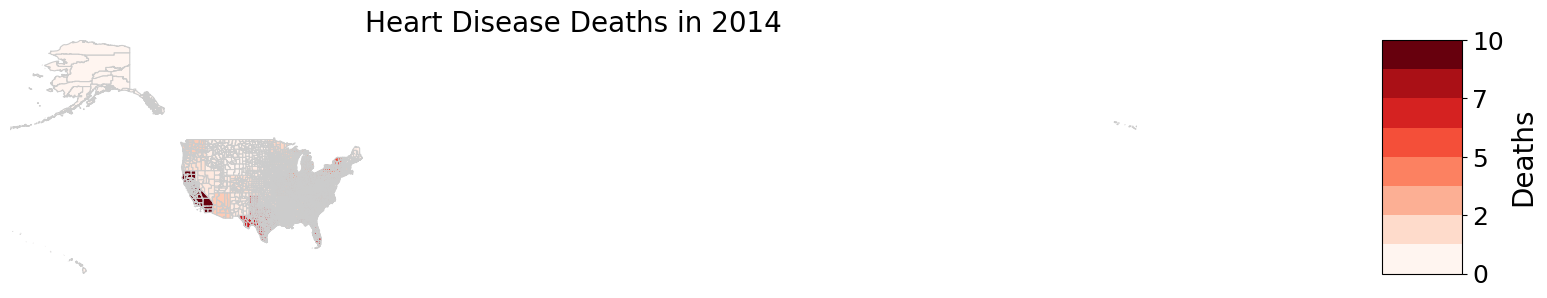

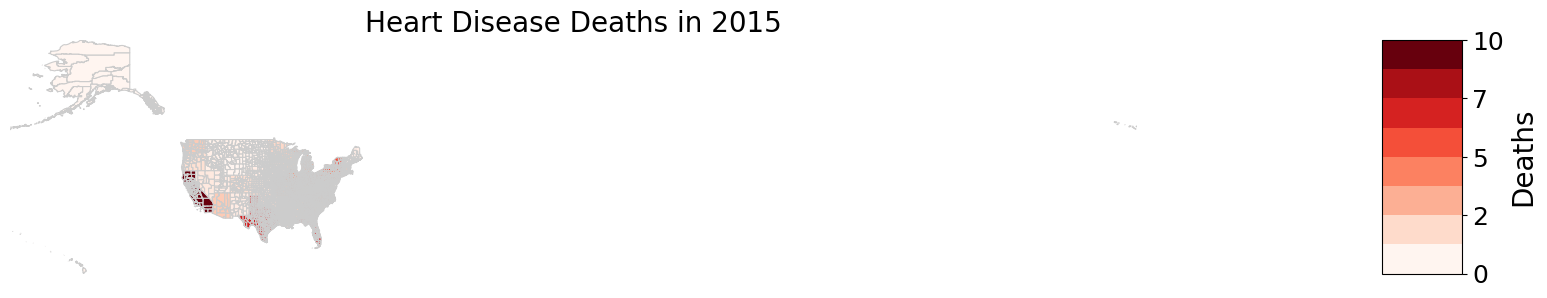

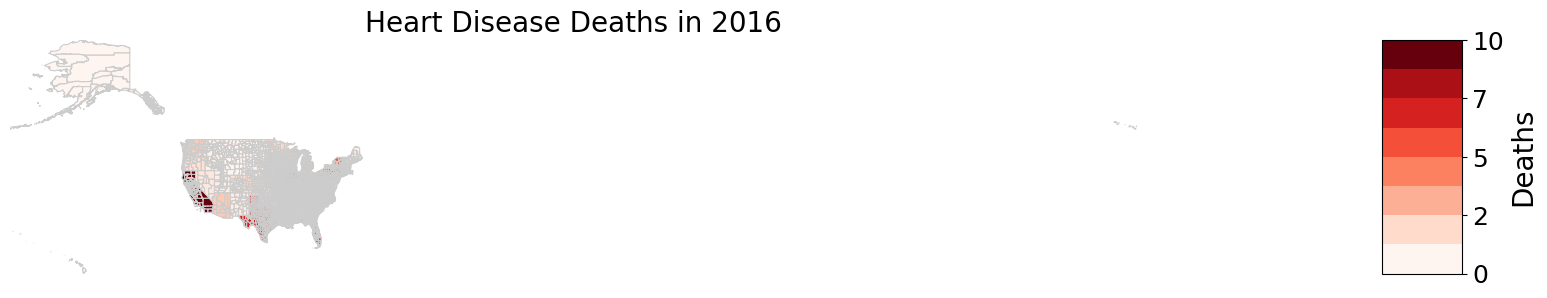

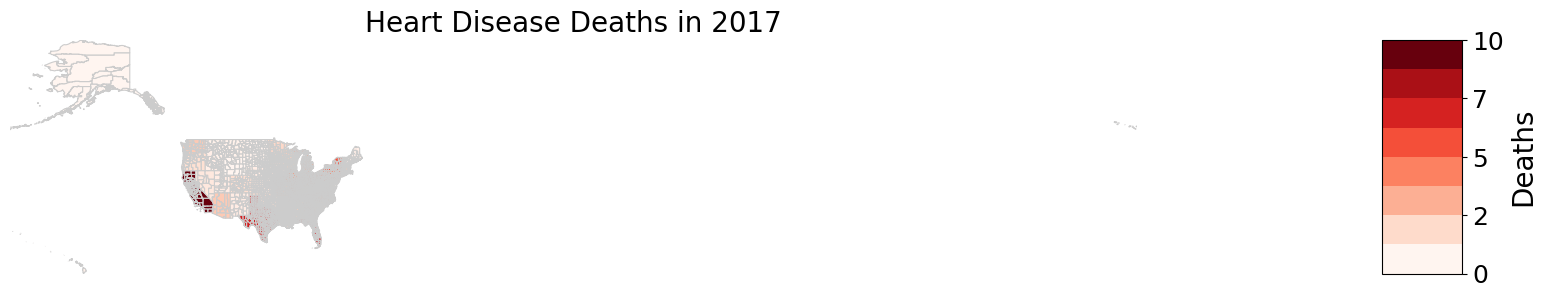

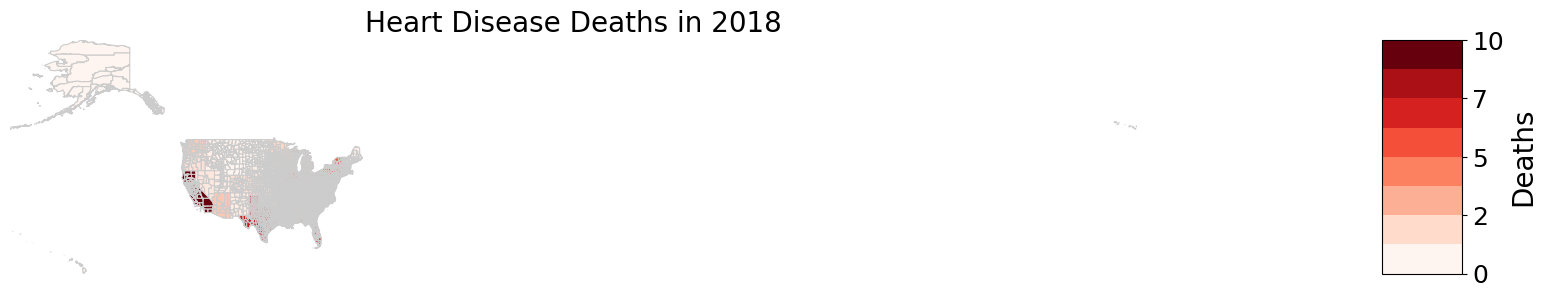

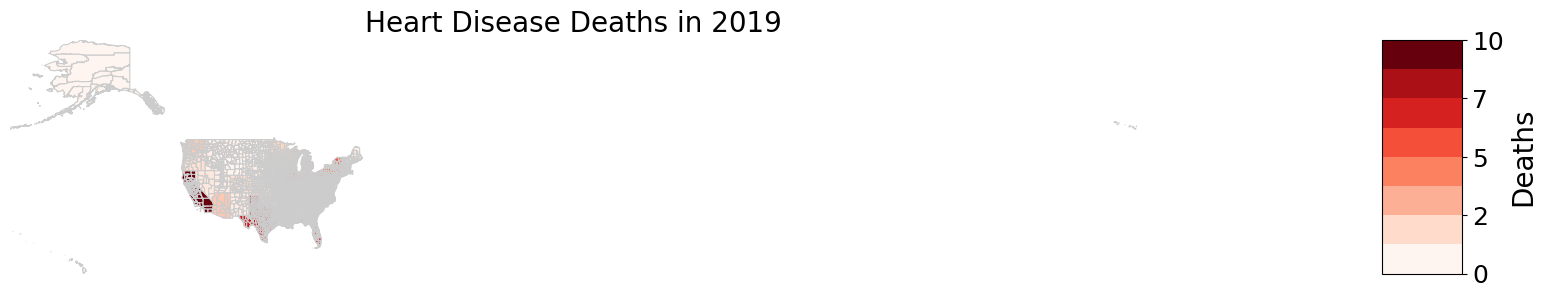

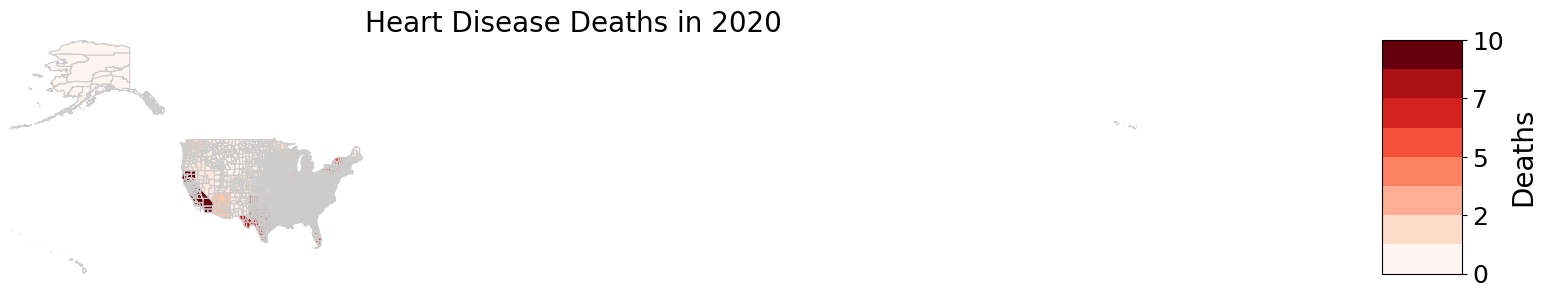

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

warnings.filterwarnings("ignore")

key = "Deaths"
def generate_us_maps_with_death_dates(u_data, map_data):
    # Merge usa_map with u_data on 'state'
    merged_data = pd.merge(map_data, u_data, left_on='State', right_on='state', how='inner')


    # Create PDF to save the map plots
    pp = PdfPages("Heart_Disease.pdf")

    # Loop through the unique values of 'Year' in u_data
    for year in u_data['Year'].unique():
        # Filter data for the specific year
        year_data = merged_data[merged_data['Year'] == year]

        # Plot US map
        fig, ax = plt.subplots(figsize=(25, 12), subplot_kw={"aspect": "equal"})
        year_data.plot(column='Deaths', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

        # Customize plot
        ax.set_title(f'Heart Disease Deaths in {year}', fontsize=20)
        ax.set_axis_off()

        # Set the color map and normalization
        vmin = 0
        vmax = 20
        cmap = cm.get_cmap("Reds", 8)
        norm = plt.Normalize(vmin=vmin, vmax=vmax)

        # Create a scalar mappable
        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax, cmap=cmap)
        cbar.ax.tick_params(labelsize=18)
        vals = list(cbar.ax.get_yticks())
        vals.append(vmax)
        cbar.ax.set_yticklabels([int(x) for x in vals])
        cbar.ax.set_ylabel(key, fontsize=20)

        # Adjust spacing between map and colorbar
        plt.subplots_adjust(right=0.8)

        # Save plot to PDF
        plt.show()
        pp.savefig(fig, bbox_inches="tight")
        plt.close()


# Load USA map data
map_data = gpd.read_file("countiesWithStatesAndPopulation.shp")

# Call the function with the provided data and USA map
generate_us_maps_with_death_dates(u_data, map_data)

